In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds - 5.152[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds - 5.152[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = '../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds'

filedict = get_dict_from_filedir(filedir)
root_folder = filedict['*rootdir*']
cfilename = filedict['*cfilename*']
survey = filedict['survey']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'synthetic'])
LCDataset:
[raw - samples 2,041]
(*) obs_samples: 64,811 - min_len: 6 - max_dur: 538.8[days] - dur(p50): 52.9[days] - cadence(p50): 1.0[days]
(g) obs_samples: 28,173 - min_len: 0 - max_dur: 538.8[days] - dur(p50): 38.8[days] - cadence(p50): 3.0[days]
(r) obs_samples: 36,638 - min_len: 0 - max_dur: 538.8[days] - dur(p50): 50.8[days] - cadence(p50): 3.0[days]
   |        | SLSN - 31/2,041 (1.52%)
   |██████  | SNIa - 1,534/2,041 (75.16%)
   |▍       | SNIbc - 100/2,041 (4.90%)
   |█▍      | allSNII - 376/2,041 (18.42%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[outliers - samples 6]
(*) obs_samples: 363 - min_len: 10 - max_dur: 412.9[days] - dur(p50): 221.7[days] - cadence(p50): 1.0[days]
(g

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
14.471903371185483
15.255891935221909


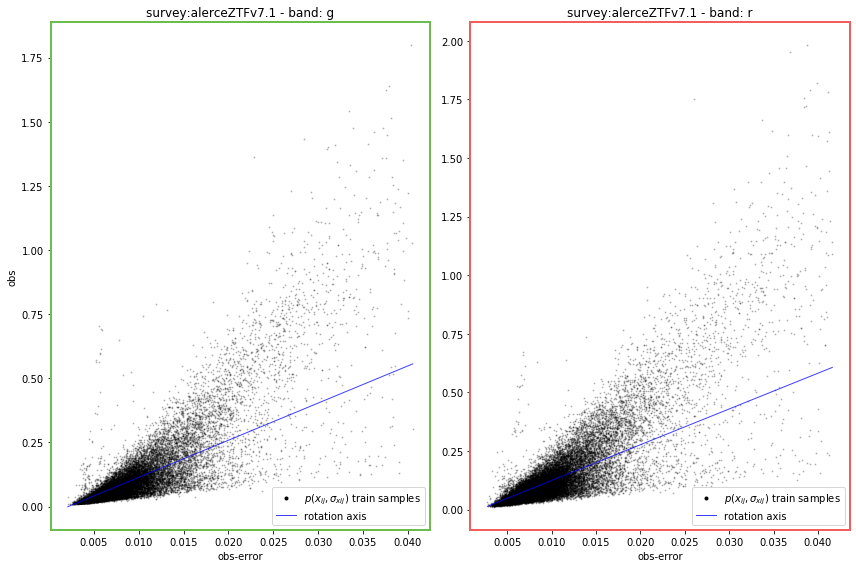

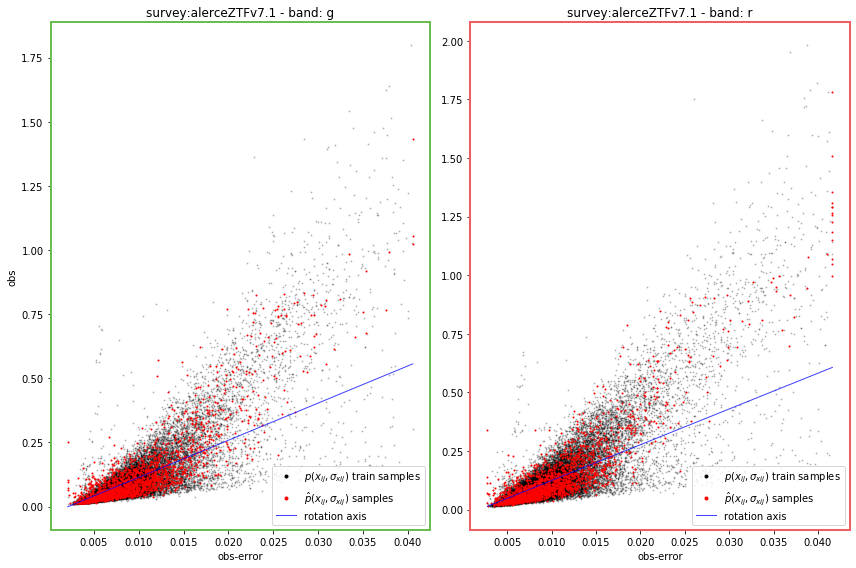

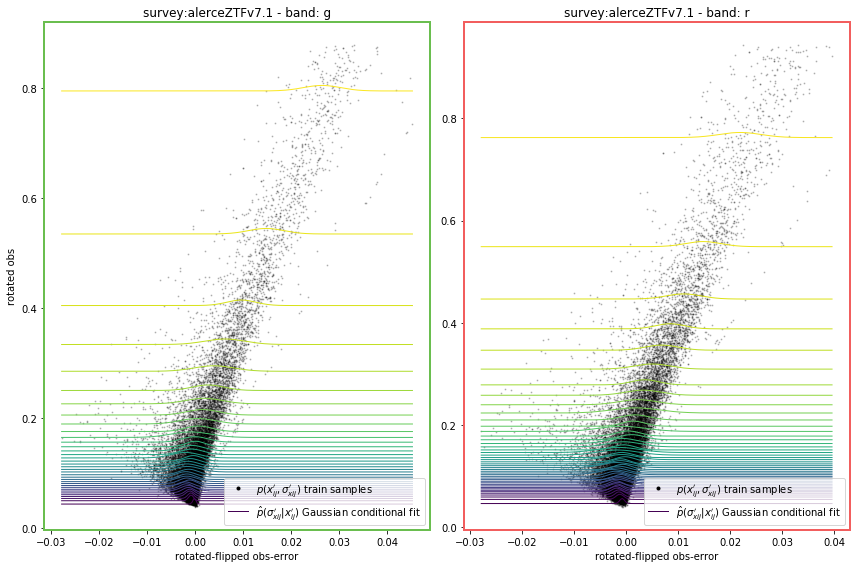

In [4]:
%load_ext autoreload
%autoreload 2
from synthsne.distr_fittings import ObsErrorConditionalSampler
from synthsne.plots.samplers import plot_obse_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1, add_samples=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


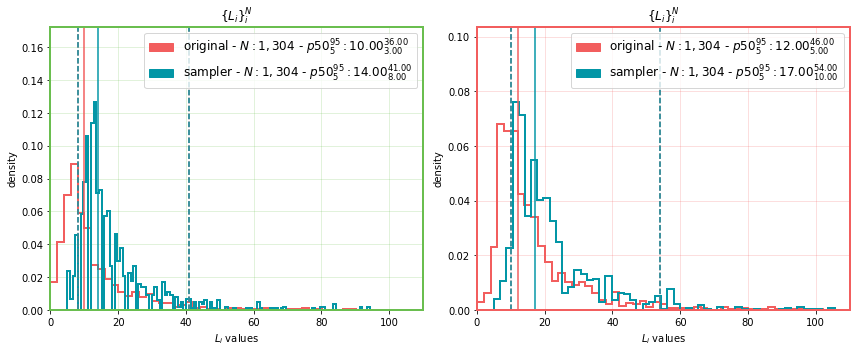

In [5]:
%load_ext autoreload
%autoreload 2
from synthsne.distr_fittings import CurveLengthSampler
from synthsne.plots.samplers import plot_length_samplers

band_names = lcdataset[set_name].band_names
offset = 5
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b, offset) for b in band_names}
plot_length_samplers(length_sampler_bdict, lcdataset, set_name)

In [6]:
from flamingchoripan.files import load_pickle, save_pickle
from synthsne import C_

to_save = {
    'obse_sampler_bdict':obse_sampler_bdict,
    'length_sampler_bdict':length_sampler_bdict,
}
save_filedir = f'../save/{survey}/{cfilename}/{set_name}/samplers.{C_.EXT_SAMPLER}'
save_pickle(save_filedir, to_save)

> saving: ../save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0/train/samplers.smplr
